## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [5]:
# importing necessesary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
episodes = pd.read_csv('office_episodes.csv') #importing the dataset
episodes.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [8]:
plt.rcParams['figure.figsize'] = [11, 7] #setting the figure size

In [9]:
# mapping different rating values to certain colors
cols=[] #instantiating the colors list to be added to

for ind , row in episodes.iterrows() :
    if row['scaled_ratings'] < 0.25 :
        cols.append('red')
    elif row['scaled_ratings'] < 0.50 :
        cols.append('orange')
    elif row['scaled_ratings'] <0.75 :
        cols.append('lightgreen')
    else :
        cols.append('darkgreen')

In [26]:
episodes['colors']=cols  # adding the colors list as column to the dataset      

In [27]:
# mapping the episodes with guests to be in different sizes
size=[] #instantiating the size list to be added to
for ind , row in episodes.iterrows():
        if row['has_guests'] == True :
         size.append(250)
        else:
            size.append(25)

In [28]:
episodes['sizes']=size   #adding size list as a column to the dataset
episodes.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,sizes,colors
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125,25,orange
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125,25,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500,25,orange
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875,25,orange
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250,25,lightgreen


In [53]:
#filltering episodes with guests and non-guests
non_guest=episodes[episodes['has_guests']==False] 
have_guest=episodes[episodes['has_guests']==True]
non_guest.shape[0] , have_guest.shape[0] #getting the number of episodes with guests and with no guest

(159, 29)

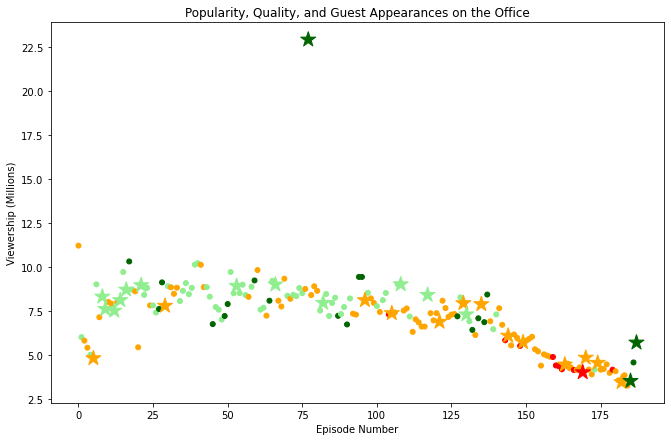

In [30]:
fig = plt.figure() #instantiating the figure

#creating a scatter plot for non-guest episodes
plt.scatter(x=non_guest['episode_number'],y=non_guest['viewership_mil']
           ,c=non_guest['colors']
           , s= non_guest['sizes']); 

#creating a scatter plot for guest episodes
plt.scatter(x=have_guest['episode_number'],y=have_guest['viewership_mil']
           ,c=have_guest['colors']
           , s= have_guest['sizes']
           , marker='*');

plt.xlabel("Episode Number") #labeling x axis
plt.ylabel("Viewership (Millions)") #labeling y axis
plt.title("Popularity, Quality, and Guest Appearances on the Office") # titling the plot

plt.show() #showing the plot 



In [44]:
episodes[episodes['viewership_mil']==episodes['viewership_mil'].max()][['episode_title','viewership_mil','release_date']]

,episode_title,viewership_mil,release_date
77,Stress Relief,22.91,2009-02-01


In [43]:
#getting the guest stars of the most viewed episode
max_episode_guests = episodes[episodes['viewership_mil']==episodes['viewership_mil'].max()]
max_episode_guests[['guest_stars']]

,guest_stars
77,"Cloris Leachman, Jack Black, Jessica Alba"


#### `conclusion` : we can see that first 50% of the episodes had the best views number and rating, and the last 50% of the episodes had the less views and the worst rating, but we have one episode the substantial amount of views and highest ratign, it was "Stress Relief" episode in Feb 2009, it had 22.91 million views